In [114]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def visualize(path):
    if isinstance(path, str):
        df = pd.read_json(path)
    elif isinstance(path, pd.DataFrame):
        df = path
    if 'devAcc' in df:
        maxDevAccRow = df.loc[df['devAcc'].idxmax()]
        print('Max devAcc', maxDevAccRow['devAcc'])
        print('Max devAccEpoch', maxDevAccRow['epoch'])
    if 'trainAcc' in df:
        maxTrainAccRow = df.loc[df['trainAcc'].idxmax()]
        print('Max trainAcc', maxTrainAccRow['trainAcc'])
        print('Max trainAccEpoch', maxTrainAccRow['epoch'])
    disp_df = df[['devAcc', 'devLoss', 'trainAcc', 'trainLoss']]
    sns.set_style("darkgrid")
    sns.lineplot(data=disp_df)
    plt.ylim(0.0, 1.0)

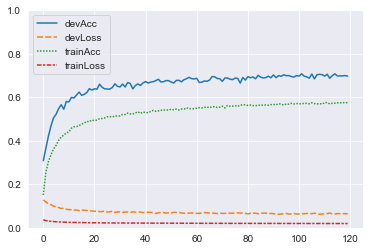

In [50]:
visualize('job22.json')

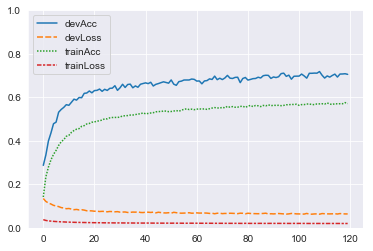

In [51]:
visualize('job23.json')

In [52]:
df = pd.read_json('job23.json')
df['devAcc'].max()

0.7185456182459271

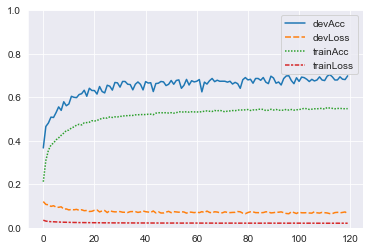

In [53]:
visualize('job21.json')

In [44]:
j3 = pd.read_json('job3.json')
j6 = pd.read_json('job6.json')
concated = pd.concat([j3, j6])
l = list(concated[0])

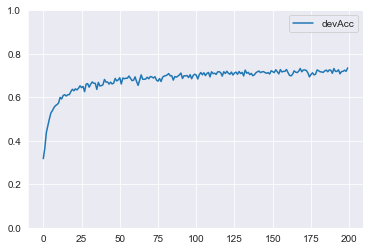

In [77]:
import numpy as np
data = pd.DataFrame({'devAcc': np.array(l)})
# sns.lineplot(data=np.array(l))
visualize(data)

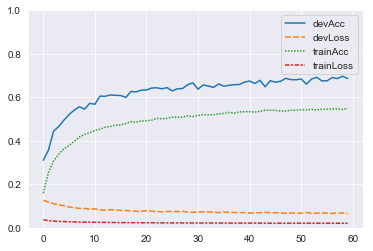

In [78]:
visualize('job11.json')

Max devAcc 0.7441955526098071
Max trainAcc 0.605740017361111


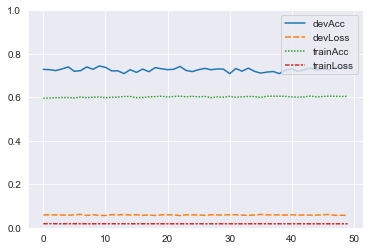

In [83]:
visualize('job7.json')

Max devAcc 0.745973675799884
Max trainAcc 0.617865668402777


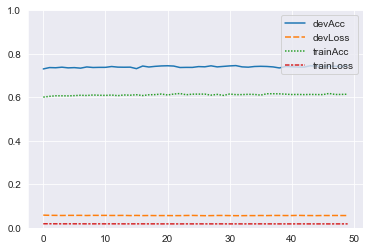

In [84]:
visualize('job9.json')

Max devAcc 0.737205690188373
Max trainAcc 0.60009765625


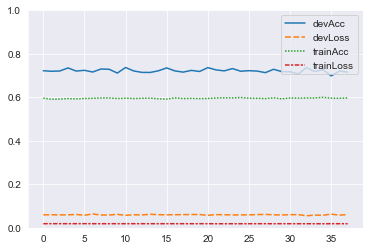

In [85]:
visualize('job6_1.json')

Max devAcc 0.8528654350222441
Max trainAcc 0.803249782986111


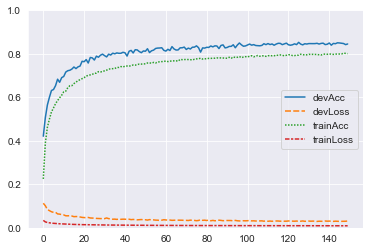

In [7]:
visualize('norm1_dr_3.json')

Max devAcc 0.857586658043827
Max trainAcc 0.826850043402777


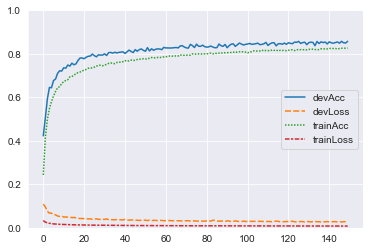

In [13]:
visualize('outputs_json/norm4_dr_2.json')

Max devAcc 0.8588333880301001
Max trainAcc 0.8705783420138881


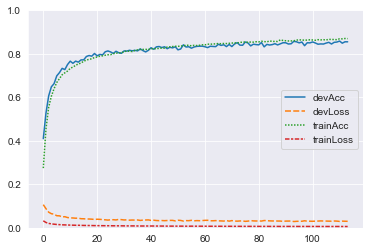

In [12]:
visualize('outputs_json/norm6_dr_0.json')

Max devAcc 0.8762467299862731
Max trainAcc 0.8752170138888881


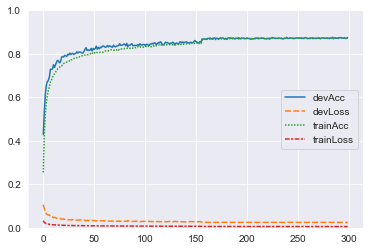

In [13]:
visualize('outputs_json/norm7_dr_1.json')

Max devAcc 0.8756744604316541
Max trainAcc 0.9087999131944441


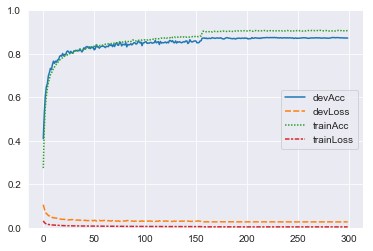

In [16]:
visualize('outputs_json/norm9_dr_0.json')

Max devAcc 0.8790672009797401
Max trainAcc 0.911376953125


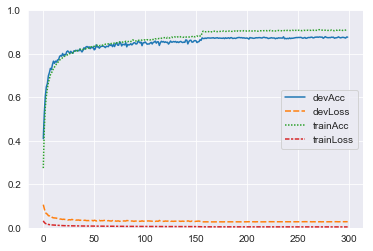

In [17]:
visualize('outputs_json/norm8_dr_0.json')

Max devAcc 0.8757970896985031
Max trainAcc 0.9007432725694441


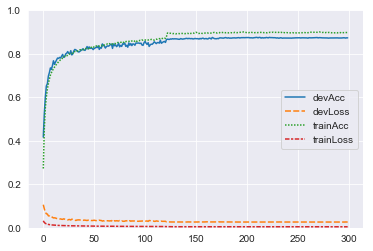

In [19]:
visualize('outputs_json/norm_10_dr_0.json')

Max devAcc 0.7058229819588031
Max trainAcc 0.7159598214285711


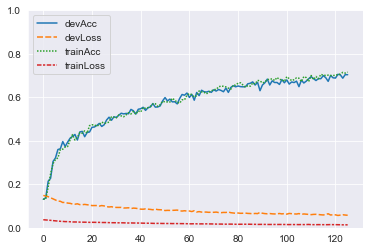

In [4]:
visualize('outputs_json/fluent_test.json')

Max devAcc 0.902173913043478
Max devAccEpoch 1794
Max trainAcc 0.9095982142857141
Max trainAccEpoch 1380


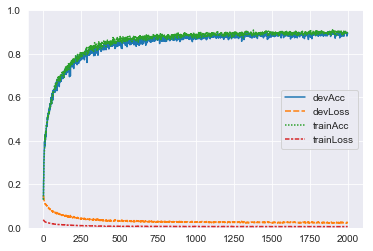

In [40]:
visualize('outputs_json/fluent_test4.json')

Max devAcc 0.8875000000000001
Max trainAcc 0.896763392857142


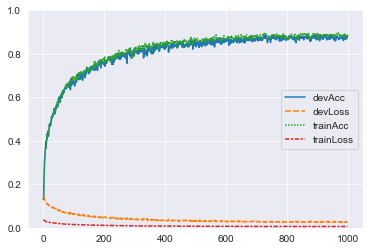

In [19]:
visualize('outputs_json/fluent_test6.json')

Max devAcc 0.8494565217391301
Max trainAcc 0.8761160714285711


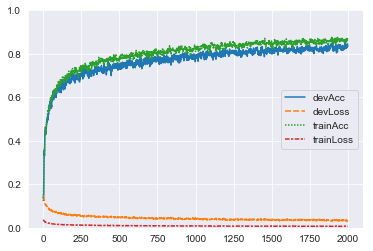

In [20]:
visualize('outputs_json/fluent_test7.json')

Max devAcc 0.819254658533179
Max devAccEpoch 1138
Max trainAcc 0.8526785714285711
Max trainAccEpoch 1129


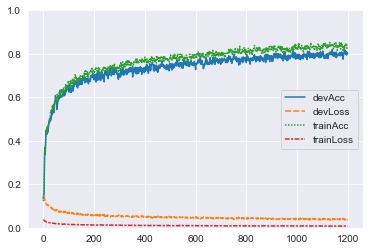

In [52]:
visualize('outputs_json/fluent_test8.json')

In [41]:
((32 - 32 + 1) / (1*1)) * ((40 - 8 + 1) / (1*3)) * 54

594.0

In [46]:
(32-20+1)*(40-8+1)*64

27456

In [44]:
32*128

4096

In [47]:
128*4

512

In [51]:
((32-20 + 1), int((40-8+1)/3))

(13, 11)

In [56]:
df = pd.read_json('outputs_json/fluent_test4.json')

In [57]:
df = df.loc[:1200]

In [58]:
df['trainAcc'].max()

0.9056919642857141

In [2]:
def layer_size(kind, input_size, hidden_size):
    multiplier = 3 if kind == 'GRU'else 4
    return multiplier * (input_size * hidden_size + hidden_size ** 2 + hidden_size)

def rnn_size(kind, input_size, hidden_size, layers):
    ret = 0
    current_input = input_size
    for i in range(layers):
        ret += layer_size(kind, current_input, hidden_size)
        current_input = hidden_size
    return ret

In [6]:
rnn_size('LSTM', 40, 128, 2)

218112

In [8]:
%%bash
ls ./models | grep lstm_a

ls: ./models: No such file or directory


CalledProcessError: Command 'b'ls ./models | grep lstm_a\n'' returned non-zero exit status 1.

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
3943428 / 41052

96.05933937445191

In [12]:
16246260 / 165900

97.92802893309222

In [18]:
def lstm_madd(num_layers, hidden_size, input_size, seq_len):
    madds = 0
    for i in range(num_layers):
        hidden_mult = 4 * hidden_size
        madds += (input_size * hidden_mult + (input_size - 1) * hidden_mult +
                  hidden_size * hidden_mult + (hidden_size - 1) * hidden_mult) * seq_len
        input_size = hidden_size

    return madds

In [22]:
lstm_madd(2, 512, 40, 50)

322355200

In [40]:
hs = [128, 60, 40, 35, 30, 20, 12][::-1]
test = [91.76, 90.21, 90.06, 89.63, 87.45, 76.28, 72.17][::-1]
params = [165900, 41052, 20172,16077, 12432, 6492, 3036][::-1]

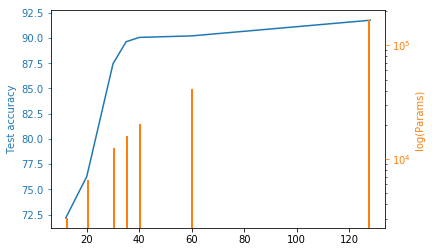

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax1.plot(hs, test, color="C0")
ax1.set_ylabel('Test accuracy', color="C0")       
ax1.yaxis.tick_left()
ax1.tick_params(axis='y', colors="C0")
ax2.set_xticks(hs)

ax2.bar(hs,params, color="C1")
ax2.set_yscale('log')
ax2.set_ylabel('log(Params)', color="C1")       
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors="C1")
ax2.set_xticks([])
fig.savefig('lstm_hs_search.eps')

In [180]:
%%bash
open .

In [79]:
drops = [0] + [v for v in range(10,1,-1)]

In [81]:
x_values = [0] + [100.0/v for v in drops[1:]]

In [82]:
y_values = [x - .7 for x in [90.76, 90.37, 90.39, 90.20, 90.20, 90.23, 89.91, 89.10, 87.51, 87.51]]

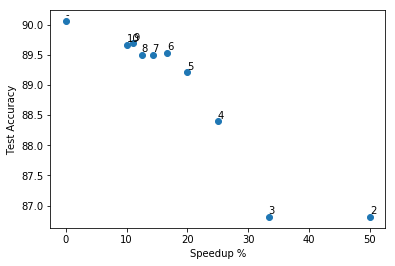

In [100]:
fig = plt.figure()
ax1 = fig.add_subplot(111, label="1")
ax1.scatter(x_values, y_values)
ax1.set_xlabel('Speedup %')
ax1.set_ylabel('Test Accuracy')
import math
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])

labels = [d for d in drops]
labels[0] = '-'

for i, label in enumerate(labels):
    ax1.annotate(label, ( x_values[i],.05+ y_values[i]))
fig.savefig('Subsampling.eps')

In [84]:
y_values

[90.06,
 89.67,
 89.69,
 89.5,
 89.5,
 89.53,
 89.21,
 88.39999999999999,
 86.81,
 86.81]

In [87]:
[print(ordinal(d)) for d in drops]

0th
10th
9th
8th
7th
6th
5th
4th
3rd
2nd


[None, None, None, None, None, None, None, None, None, None]

In [91]:
[print(f'{x:.1f}') for x in x_values]

0.0
10.0
11.1
12.5
14.3
16.7
20.0
25.0
33.3
50.0


[None, None, None, None, None, None, None, None, None, None]

In [93]:
[print(f'{x:.1f}') for x in y_values]

90.1
89.7
89.7
89.5
89.5
89.5
89.2
88.4
86.8
86.8


[None, None, None, None, None, None, None, None, None, None]

In [104]:
confusion_normal = [[386,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,],
 [  0, 305,   9,   7,  15,  16,   9,  19,  15,   9,  13,  18,],
 [  0,   7, 373,   7,   0,   0,  12,   1,   0,   0,   0,   0,],
 [  0,   7,   2, 338,   0,  12,   3,   1,   0,   1,   3,  19,],
 [  0,   6,   2,   0, 362,   1,   2,   1,   0,  32,  13,   4,],
 [  0,   6,   0,  12,   0, 329,   0,   0,   5,   0,   7,   5,],
 [  0,   8,   7,   2,   2,   0, 359,   5,   0,   2,   2,   0,],
 [  0,  11,   0,   0,   0,   0,   4, 335,   1,   0,   0,   0,],
 [  0,  10,   0,   0,   0,   0,   0,   2, 346,  16,   0,   0,],
 [  0,   6,   0,   0,  14,   0,   0,   1,  12, 320,   2,   0,],
 [  0,   7,   2,   0,  13,   2,   3,   2,   0,   3, 346,   3,],
 [  0,  13,   0,  22,   3,  15,   0,   0,   0,   2,  10, 331,]]

In [111]:
dummy_labels = {'yes': 2, 'no': 3, 'up': 4, 'down': 5, 'left': 6, 'right': 7, 'on': 8, 'off': 9, 'stop': 10, 'go': 11, '__silence__': 0, '__unknown__': 1}
labels = {}
for k,v in dummy_labels.items():
    labels[v] = k


In [106]:
dropped_6 = [[386,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,],
 [  0, 298,   7,   7,  11,  15,   6,  15,  15,   8,   9,  19,],
 [  0,   6, 375,   7,   0,   0,  13,   0,   0,   0,   1,   1,],
 [  0,   5,   0, 339,   0,  18,   0,   1,   0,   1,   1,  23,],
 [  0,  11,   2,   0, 371,   1,   2,   2,   1,  60,  15,   5,],
 [  0,   3,   0,   4,   0, 317,   0,   0,   3,   0,   4,   3,],
 [  0,  13,   9,   6,   2,   0, 365,   7,   0,   2,   0,   0,],
 [  0,  12,   0,   0,   0,   0,   4, 338,   2,   0,   0,   0,],
 [  0,   7,   0,   1,   0,   1,   0,   1, 344,   9,   0,   0,],
 [  0,   6,   0,   0,  10,   0,   0,   1,  14, 297,   2,   0,],
 [  0,   9,   2,   0,  12,   5,   2,   2,   0,   6, 352,   6,],
 [  0,  16,   0,  24,   3,  19,   0,   0,   0,   2,  12, 323,]]

In [109]:
confusion_normal = np.array(confusion_normal)
dropped_6 = np.array(dropped_6)

In [110]:
confusion_normal - dropped_6

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   7,   2,   0,   4,   1,   3,   4,   0,   1,   4,  -1],
       [  0,   1,  -2,   0,   0,   0,  -1,   1,   0,   0,  -1,  -1],
       [  0,   2,   2,  -1,   0,  -6,   3,   0,   0,   0,   2,  -4],
       [  0,  -5,   0,   0,  -9,   0,   0,  -1,  -1, -28,  -2,  -1],
       [  0,   3,   0,   8,   0,  12,   0,   0,   2,   0,   3,   2],
       [  0,  -5,  -2,  -4,   0,   0,  -6,  -2,   0,   0,   2,   0],
       [  0,  -1,   0,   0,   0,   0,   0,  -3,  -1,   0,   0,   0],
       [  0,   3,   0,  -1,   0,  -1,   0,   1,   2,   7,   0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,  -2,  23,   0,   0],
       [  0,  -2,   0,   0,   1,  -3,   1,   0,   0,  -3,  -6,  -3],
       [  0,  -3,   0,  -2,   0,  -4,   0,   0,   0,   0,  -2,   8]])

In [165]:
annot = [labels[i] for i in range(len(labels))]
df_cm = pd.DataFrame(
    confusion_normal, 
    index = annot, 
    columns = annot)

In [166]:
dropped_cm = pd.DataFrame(
    dropped_6,
    index = annot,
    columns = annot)

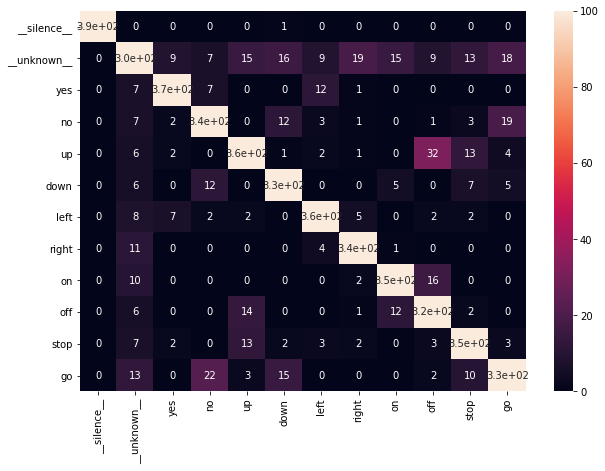

In [186]:

fig = plt.figure(figsize = (10,7))
# replaced = df_cm.replace(0, np.nan)
replaced = df_cm.copy()
# replaced.values[[np.arange(replaced.shape[0])]*2] = -1
replaced = replaced.replace(-1, np.nan)
sn.heatmap(replaced, annot=True, vmax=100)
# plt.savefig('original_cf.eps')

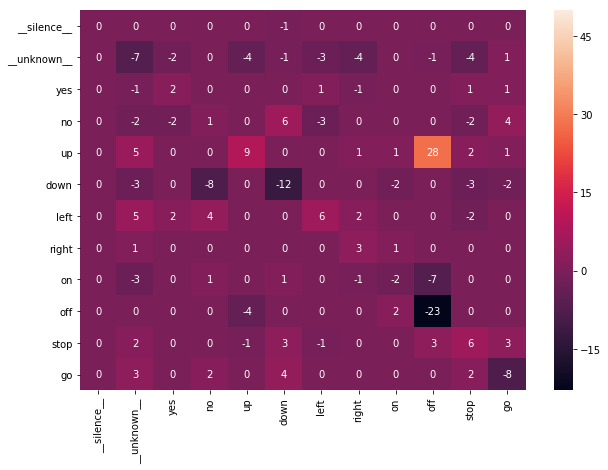

In [183]:
fig = plt.figure(figsize = (10,7))
sn.heatmap((dropped_cm - df_cm), annot=True,vmax=50)
plt.savefig('scaledown-cf-diff.eps')

In [235]:
def scale_down(in_len, des_len, scale_down):
    overflow = (in_len - des_len) / scale_down
    if overflow < 4:
        return in_len
    return in_len / (in_len / overflow)

In [236]:
scale_x = np.linspace(20, 100, 100 - 20 + 1)

In [237]:
scale_y1 = np.array([scale_down(x, 44, 1) for x in scale_x])
scale_y11 = np.array([scale_down(x, 44, 1.1) for x in scale_x])
scale_y15 = np.array([scale_down(x, 44, 1.5) for x in scale_x])
scale_y10 = np.array([scale_down(x, 44, 10) for x in scale_x])

In [238]:
def get_array(scale):
    return np.array([scale_down(x, 44, scale) for x in scale_x])

In [243]:
lstm_adam2_data = [['2019-05-03T08:38:28.029209', 0.12,],
['2019-05-03T08:39:57.499413', 0.16,],
['2019-05-03T08:44:26.678216', 0.21,],
['2019-05-03T08:47:27.895093', 0.23,],
['2019-05-03T08:48:58.929214', 0.24,],
['2019-05-03T08:50:29.076718', 0.29,],
['2019-05-03T08:54:59.594721', 0.40,],
['2019-05-03T09:22:47.676206', 0.46,],
['2019-05-03T09:31:48.399337', 0.54,],
['2019-05-03T09:34:49.048061', 0.59,],
['2019-05-03T09:36:18.936299', 0.60,],
['2019-05-03T09:37:45.185237', 0.61,],
['2019-05-03T09:42:08.792527', 0.64,],
['2019-05-03T09:43:36.542870', 0.67,],
['2019-05-03T09:47:58.029377', 0.68,],
['2019-05-03T09:50:52.981346', 0.69,],
['2019-05-03T09:52:20.355077', 0.70,],
['2019-05-03T09:58:15.042177', 0.71,],
['2019-05-03T10:05:31.002194', 0.72,],
['2019-05-03T10:09:55.884330', 0.73,],
['2019-05-03T10:11:23.210231', 0.76,],
['2019-05-03T10:12:51.088219', 0.77,],
['2019-05-03T10:14:18.885982', 0.78,],
['2019-05-03T10:15:46.148166', 0.78,],
['2019-05-03T10:20:12.314490', 0.79,],
['2019-05-03T10:21:40.179658', 0.80,],
['2019-05-03T10:33:20.860194', 0.80,],
['2019-05-03T10:36:21.863764', 0.81,],
['2019-05-03T10:43:45.920012', 0.82,],
['2019-05-03T10:51:03.651455', 0.82,],
['2019-05-03T10:58:19.032546', 0.83,],
['2019-05-03T10:59:45.006586', 0.83,],
['2019-05-03T11:08:28.055909', 0.83,],
['2019-05-03T11:14:16.626200', 0.83,],
['2019-05-03T11:15:46.232460', 0.83,],
['2019-05-03T11:30:23.020030', 0.83,],
['2019-05-03T11:40:36.276947', 0.83,],
['2019-05-03T11:42:03.881699', 0.84,],
['2019-05-03T11:46:29.385873', 0.84,],
['2019-05-03T11:55:10.619053', 0.84,],
['2019-05-03T11:59:34.085665', 0.84,],
['2019-05-03T12:19:55.918365', 0.85,],
['2019-05-03T12:44:35.905777', 0.86,],
['2019-05-03T12:46:06.213270', 0.87,],
['2019-05-03T12:47:34.958760', 0.87,],
['2019-05-03T12:50:34.163628', 0.88,],
['2019-05-03T12:52:01.835936', 0.88,],
['2019-05-03T12:53:30.017247', 0.88,],
['2019-05-03T12:54:59.024075', 0.89,],
['2019-05-03T12:57:52.542035', 0.89,],
['2019-05-03T12:59:19.352526', 0.89,],
['2019-05-03T13:02:11.587847', 0.89,],
['2019-05-03T13:03:38.192373', 0.90,],
['2019-05-03T13:19:48.629294', 0.90,],
['2019-05-03T13:22:42.511436', 0.90,],
['2019-05-03T13:38:49.345703', 0.90,],
['2019-05-03T13:43:17.165533', 0.91,],
['2019-05-03T13:49:05.798342', 0.91,],
['2019-05-03T14:06:37.864650', 0.91,],
['2019-05-03T14:11:01.984918', 0.91,],
['2019-05-03T14:18:20.435086', 0.91,],
['2019-05-03T14:22:43.072275', 0.91,],
['2019-05-03T14:28:32.620477', 0.91,],
['2019-05-03T14:31:28.146266', 0.91,],
['2019-05-03T14:35:52.437099', 0.92,],
['2019-05-03T14:40:16.843987', 0.92,],
['2019-05-03T15:15:21.825673', 0.92,],
['2019-05-03T15:51:34.739566', 0.92,],
['2019-05-03T15:53:02.760850', 0.92,],
['2019-05-03T15:54:29.984285', 0.92,],
['2019-05-03T17:03:03.469738', 0.92,],
['2019-05-03T17:07:28.096105', 0.92,],
['2019-05-03T17:30:47.177222', 0.93,],
['2019-05-03T18:54:20.155932', 0.93,],
['2019-05-03T23:13:24.610885', 0.93,],
['2019-05-04T00:13:01.311572', 0.93,],
['2019-05-04T01:43:50.145208', 0.93,],
['2019-05-04T06:58:37.267123', 0.93,],
['2019-05-04T07:51:01.561230', 0.93,],]

In [268]:
lstm_adam1_data = [
    ['2019-05-02T19:56:45.836752', 0.08,],
['2019-05-02T19:58:11.304682', 0.08,],
['2019-05-02T19:59:35.007238', 0.08,],
['2019-05-02T20:31:28.207515', 0.08,],
['2019-05-02T20:32:52.570726', 0.09,],
['2019-05-02T20:34:16.418420', 0.10,],
['2019-05-02T20:35:40.004119', 0.11,],
['2019-05-02T20:37:03.271036', 0.12,],
['2019-05-02T20:38:26.504064', 0.12,],
['2019-05-02T20:39:50.623921', 0.12,],
['2019-05-02T20:41:15.077137', 0.13,],
['2019-05-02T20:42:39.359225', 0.17,],
['2019-05-02T20:44:02.814664', 0.22,],
['2019-05-02T20:45:26.276076', 0.23,],
['2019-05-02T20:46:49.343592', 0.24,],
['2019-05-02T20:46:53.409445', 0.08,],
['2019-05-02T20:48:08.475683', 0.09,],
['2019-05-02T20:48:11.953142', 0.24,],
['2019-05-02T20:49:22.777560', 0.10,],
['2019-05-02T20:50:37.228789', 0.11,],
['2019-05-02T20:51:51.717815', 0.12,],
['2019-05-02T20:53:06.113417', 0.12,],
['2019-05-02T20:53:44.168421', 0.25,],
['2019-05-02T20:54:20.623204', 0.12,],
['2019-05-02T20:55:07.296324', 0.28,],
['2019-05-02T20:56:29.931567', 0.31,],
['2019-05-02T20:56:50.414826', 0.16,],
['2019-05-02T20:57:52.500192', 0.32,],
['2019-05-02T20:58:05.257577', 0.22,],
['2019-05-02T20:59:19.591828', 0.23,],
['2019-05-02T21:00:33.909337', 0.24,],
['2019-05-02T21:01:48.603731', 0.24,],
['2019-05-02T21:02:00.999559', 0.33,],
['2019-05-02T21:03:24.553109', 0.33,],
['2019-05-02T21:04:47.639082', 0.34,],
['2019-05-02T21:06:10.842277', 0.35,],
['2019-05-02T21:06:46.412794', 0.24,],
['2019-05-02T21:07:33.601634', 0.37,],
['2019-05-02T21:08:00.713148', 0.28,],
['2019-05-02T21:08:56.342057', 0.39,],
['2019-05-02T21:09:15.274472', 0.31,],
['2019-05-02T21:10:19.207441', 0.40,],
['2019-05-02T21:10:29.731520', 0.32,],
['2019-05-02T21:11:42.480085', 0.41,],
['2019-05-02T21:11:43.885445', 0.32,],
['2019-05-02T21:14:30.691391', 0.44,],
['2019-05-02T21:15:26.258548', 0.33,],
['2019-05-02T21:15:55.840540', 0.46,],
['2019-05-02T21:16:40.503240', 0.33,],
['2019-05-02T21:17:19.221543', 0.49,],
['2019-05-02T21:17:54.695243', 0.35,],
['2019-05-02T21:18:43.590647', 0.50,],
['2019-05-02T21:19:08.760753', 0.38,],
['2019-05-02T21:20:08.090611', 0.51,],
['2019-05-02T21:20:22.857564', 0.39,],
['2019-05-02T21:21:36.925843', 0.41,],
['2019-05-02T21:22:50.980201', 0.43,],
['2019-05-02T21:22:55.260040', 0.52,],
['2019-05-02T21:24:05.120493', 0.44,],
['2019-05-02T21:24:18.567908', 0.53,],
['2019-05-02T21:25:19.306174', 0.45,],
['2019-05-02T21:25:41.738685', 0.55,],
['2019-05-02T21:26:33.861042', 0.46,],
['2019-05-02T21:27:04.906019', 0.57,],
['2019-05-02T21:27:48.380864', 0.47,],
['2019-05-02T21:28:27.630284', 0.58,],
['2019-05-02T21:29:02.947558', 0.49,],
['2019-05-02T21:29:50.531423', 0.58,],
['2019-05-02T21:30:17.750518', 0.51,],
['2019-05-02T21:31:13.945170', 0.59,],
['2019-05-02T21:31:32.598275', 0.53,],
['2019-05-02T21:32:47.254985', 0.53,],
['2019-05-02T21:34:01.851634', 0.55,],
['2019-05-02T21:34:03.001384', 0.61,],
['2019-05-02T21:35:16.518255', 0.55,],
['2019-05-02T21:35:27.698138', 0.63,],
['2019-05-02T21:36:31.017546', 0.57,],
['2019-05-02T21:37:45.524513', 0.60,],
['2019-05-02T21:38:14.863961', 0.64,],
['2019-05-02T21:39:00.120027', 0.62,],
['2019-05-02T21:40:14.719454', 0.62,],
['2019-05-02T21:41:29.307186', 0.63,],
['2019-05-02T21:42:24.287879', 0.64,],
['2019-05-02T21:42:43.852771', 0.64,],
['2019-05-02T21:43:47.241736', 0.66,],
['2019-05-02T21:45:12.782209', 0.64,],
['2019-05-02T21:46:27.197420', 0.65,],
['2019-05-02T21:47:41.787472', 0.65,],
['2019-05-02T21:50:41.288896', 0.66,],
['2019-05-02T21:51:25.864464', 0.65,],
['2019-05-02T21:52:05.382930', 0.67,],
['2019-05-02T21:53:31.148343', 0.67,],
['2019-05-02T21:55:09.583377', 0.66,],
['2019-05-02T21:57:38.961436', 0.66,],
['2019-05-02T22:01:23.255564', 0.67,],
['2019-05-02T22:04:42.796549', 0.67,],
['2019-05-02T22:06:05.688391', 0.68,],
['2019-05-02T22:06:22.065172', 0.67,],
['2019-05-02T22:08:50.785433', 0.67,],
['2019-05-02T22:11:37.744459', 0.68,],
['2019-05-02T22:12:34.059774', 0.67,],
['2019-05-02T22:13:48.335529', 0.68,],
['2019-05-02T22:20:00.629346', 0.69,],
['2019-05-02T22:21:15.249108', 0.69,],
['2019-05-02T22:21:22.695878', 0.68,],
['2019-05-02T22:22:46.331247', 0.69,],
['2019-05-02T22:34:54.602872', 0.69,],
['2019-05-02T22:36:40.897490', 0.69,],
['2019-05-02T22:38:04.001185', 0.69,],
['2019-05-02T22:42:12.684199', 0.69,],
['2019-05-02T22:43:34.114535', 0.69,],
['2019-05-02T22:44:59.315482', 0.70,],
['2019-05-02T22:47:46.541212', 0.71,],
['2019-05-02T22:49:10.117650', 0.73,],
['2019-05-02T22:50:33.220667', 0.73,],
['2019-05-02T22:51:56.395600', 0.73,],
['2019-05-02T22:53:19.267417', 0.74,],
['2019-05-02T22:53:30.330081', 0.70,],
['2019-05-02T22:54:41.695430', 0.75,],
['2019-05-02T22:58:28.474110', 0.70,],
['2019-05-02T23:04:22.967659', 0.75,],
['2019-05-02T23:10:51.662427', 0.70,],
['2019-05-02T23:13:20.468914', 0.70,],
['2019-05-02T23:14:12.914243', 0.75,],
['2019-05-02T23:15:36.111311', 0.76,],
['2019-05-02T23:22:01.382645', 0.70,],
['2019-05-02T23:23:15.724621', 0.70,],
['2019-05-02T23:24:30.189823', 0.71,],
['2019-05-02T23:29:25.305274', 0.77,],
['2019-05-02T23:31:56.275857', 0.71,],
['2019-05-02T23:37:40.814166', 0.77,],
['2019-05-02T23:51:35.827068', 0.78,],
['2019-05-02T23:51:48.535156', 0.71,],
['2019-05-02T23:59:14.365536', 0.72,],
['2019-05-03T00:00:28.689646', 0.72,],
['2019-05-03T00:04:03.228974', 0.78,],
['2019-05-03T00:16:36.868905', 0.78,],
['2019-05-03T00:17:51.010125', 0.72,],
['2019-05-03T00:22:49.021803', 0.72,],
['2019-05-03T00:31:49.776441', 0.78,],
['2019-05-03T00:37:44.521750', 0.73,],
['2019-05-03T00:42:41.817136', 0.73,],
['2019-05-03T00:45:36.607621', 0.79,],
['2019-05-03T00:53:52.744027', 0.79,],
['2019-05-03T00:55:15.264115', 0.79,],
['2019-05-03T00:56:38.047775', 0.79,],
['2019-05-03T01:01:17.080857', 0.73,],
['2019-05-03T01:04:54.960978', 0.79,],
['2019-05-03T01:04:59.973548', 0.73,],
['2019-05-03T01:09:57.914174', 0.73,],
['2019-05-03T01:18:38.513089', 0.73,],
['2019-05-03T01:21:34.651383', 0.80,],
['2019-05-03T01:31:13.355035', 0.80,],
['2019-05-03T01:34:00.391725', 0.80,],
['2019-05-03T01:36:02.019821', 0.74,],
['2019-05-03T01:37:16.616584', 0.74,],
['2019-05-03T02:03:12.636920', 0.80,],
['2019-05-03T02:04:35.997372', 0.80,],
['2019-05-03T02:04:36.240164', 0.74,],
['2019-05-03T02:05:59.326612', 0.80,],
['2019-05-03T02:07:05.007634', 0.74,],
['2019-05-03T02:10:08.788147', 0.81,],
['2019-05-03T02:16:59.167386', 0.74,],
['2019-05-03T02:24:01.237583', 0.81,],
['2019-05-03T02:29:34.139880', 0.81,],
['2019-05-03T02:33:08.052668', 0.74,],
['2019-05-03T02:38:05.539844', 0.75,],
['2019-05-03T02:39:12.797462', 0.81,],
['2019-05-03T02:41:48.293153', 0.75,],
['2019-05-03T03:14:05.098169', 0.75,],
['2019-05-03T03:15:16.712415', 0.81,],
['2019-05-03T03:16:39.880263', 0.82,],
['2019-05-03T03:38:49.813409', 0.82,],
['2019-05-03T03:47:38.709527', 0.75,],
['2019-05-03T04:09:56.869996', 0.75,],
['2019-05-03T04:11:11.100133', 0.75,],
['2019-05-03T04:12:13.043272', 0.82,],
['2019-05-03T04:17:48.029795', 0.82,],
['2019-05-03T04:42:44.862139', 0.82,],
['2019-05-03T04:53:24.608779', 0.76,],
['2019-05-03T05:17:31.336833', 0.83,],
['2019-05-03T06:00:41.130107', 0.83,],
['2019-05-03T06:10:23.201446', 0.76,],
['2019-05-03T06:16:35.781340', 0.76,],
['2019-05-03T06:17:50.341852', 0.79,],
['2019-05-03T06:20:19.459058', 0.81,],
['2019-05-03T06:27:45.416733', 0.81,],
['2019-05-03T06:30:13.817370', 0.81,],
['2019-05-03T06:32:42.294986', 0.81,],
['2019-05-03T06:35:25.264447', 0.83,],
['2019-05-03T06:40:09.165008', 0.82,],
['2019-05-03T06:41:23.336985', 0.82,],
['2019-05-03T06:59:57.931137', 0.82,],
['2019-05-03T07:05:51.926489', 0.83,],
['2019-05-03T07:13:39.320985', 0.82,],
['2019-05-03T07:18:37.080932', 0.82,],
['2019-05-03T07:22:30.980258', 0.83,],
['2019-05-03T07:38:26.446108', 0.83,],
['2019-05-03T07:42:09.267321', 0.83,],
['2019-05-03T07:48:45.269178', 0.83,],
]

In [297]:
gru_02 = [
['2019-05-03T09:04:16.767101', 0.11],
['2019-05-03T09:05:30.288174', 0.20],
['2019-05-03T09:06:43.213419', 0.32],
['2019-05-03T09:07:56.188883', 0.44],
['2019-05-03T09:09:09.064492', 0.56],
['2019-05-03T09:10:22.201602', 0.63],
['2019-05-03T09:11:35.473325', 0.64],
['2019-05-03T09:12:48.688086', 0.65],
['2019-05-03T09:15:14.909824', 0.68],
['2019-05-03T09:17:40.463833', 0.68],
['2019-05-03T09:18:53.137230', 0.68],
['2019-05-03T09:20:05.981234', 0.69],
['2019-05-03T09:21:18.968402', 0.70],
['2019-05-03T09:23:45.095789', 0.72],
['2019-05-03T09:24:57.905266', 0.72],
['2019-05-03T09:26:10.486481', 0.76],
['2019-05-03T09:29:48.910586', 0.76],
['2019-05-03T09:31:01.551337', 0.76],
['2019-05-03T09:33:26.797973', 0.78],
['2019-05-03T09:39:29.788200', 0.80],
['2019-05-03T09:46:46.653015', 0.80],
['2019-05-03T09:49:12.422823', 0.81],
['2019-05-03T09:52:50.540407', 0.81],
['2019-05-03T09:55:15.502932', 0.81],
['2019-05-03T10:06:10.948085', 0.82],
['2019-05-03T10:18:23.385657', 0.82],
['2019-05-03T10:24:27.476463', 0.82],
['2019-05-03T10:28:07.166275', 0.83],
['2019-05-03T10:29:20.536675', 0.83],
['2019-05-03T10:51:11.469270', 0.84],
['2019-05-03T10:56:02.747567', 0.84],
['2019-05-03T10:58:28.703916', 0.84],
['2019-05-03T11:00:54.928668', 0.84],
['2019-05-03T11:13:05.208879', 0.84],
['2019-05-03T11:19:08.507441', 0.84],
['2019-05-03T11:24:00.792142', 0.84],
['2019-05-03T11:44:38.792904', 0.85],
['2019-05-03T11:45:51.778404', 0.85],
['2019-05-03T11:47:04.636075', 0.87],
['2019-05-03T11:48:17.354897', 0.87],
['2019-05-03T11:50:42.930481', 0.87],
['2019-05-03T11:54:22.273190', 0.88],
['2019-05-03T11:55:35.303470', 0.88],
['2019-05-03T12:00:26.922606', 0.89],
['2019-05-03T12:12:38.172744', 0.89],
['2019-05-03T12:15:04.238585', 0.89],
['2019-05-03T12:19:56.098883', 0.89],
['2019-05-03T12:24:46.805679', 0.90],
['2019-05-03T12:32:03.196798', 0.90],
['2019-05-03T12:34:28.927369', 0.90],
['2019-05-03T12:44:13.255517', 0.90],
['2019-05-03T12:47:51.757902', 0.90],
['2019-05-03T12:49:05.108098', 0.90],
['2019-05-03T12:57:36.164095', 0.90],
['2019-05-03T13:09:42.838751', 0.91],
['2019-05-03T13:25:29.526242', 0.91],
['2019-05-03T13:43:40.600043', 0.91],
['2019-05-03T16:00:49.225702', 0.91],
['2019-05-03T16:38:28.828911', 0.91],
['2019-05-03T18:22:54.362185', 0.92],
['2019-05-04T00:58:49.916738', 0.92],
['2019-05-04T02:43:13.585660', 0.92],
]

In [300]:
gru_01 = [
['2019-05-02T20:59:03.254857', 0.16,],
['2019-05-02T20:59:58.624201', 0.29,],
['2019-05-02T21:00:53.794881', 0.43,],
['2019-05-02T21:01:48.953745', 0.48,],
['2019-05-02T21:02:44.153325', 0.54,],
['2019-05-02T21:03:39.424866', 0.55,],
['2019-05-02T21:04:34.763733', 0.64,],
['2019-05-02T21:05:29.910136', 0.66,],
['2019-05-02T21:06:24.989775', 0.68,],
['2019-05-02T21:08:15.105177', 0.68,],
['2019-05-02T21:09:10.255834', 0.71,],
['2019-05-02T21:12:51.252975', 0.72,],
['2019-05-02T21:20:14.083163', 0.73,],
['2019-05-02T21:21:09.448103', 0.76,],
['2019-05-02T21:30:19.236603', 0.76,],
['2019-05-02T21:31:14.520236', 0.76,],
['2019-05-02T21:37:41.672523', 0.77,],
['2019-05-02T21:41:22.938814', 0.77,],
['2019-05-02T21:45:59.002800', 0.78,],
['2019-05-02T21:57:58.575627', 0.81,],
['2019-05-02T21:58:53.467702', 0.81,],
['2019-05-02T21:59:48.475333', 0.83,],
['2019-05-02T22:03:29.031395', 0.84,],
['2019-05-02T22:04:24.240686', 0.84,],
['2019-05-02T22:06:14.602135', 0.84,],
['2019-05-02T22:08:04.562016', 0.84,],
['2019-05-02T22:11:44.556745', 0.85,],
['2019-05-02T22:21:50.870995', 0.86,],
['2019-05-02T22:22:46.203589', 0.89,],
['2019-05-02T22:24:36.921850', 0.89,],
['2019-05-02T22:28:18.242069', 0.89,],
['2019-05-02T22:31:58.880197', 0.89,],
['2019-05-02T22:32:54.016736', 0.90,],
['2019-05-02T22:35:39.267541', 0.90,],
['2019-05-02T22:38:24.068643', 0.90,],
['2019-05-02T22:48:29.224218', 0.90,],
['2019-05-02T22:49:24.543492', 0.91,],
['2019-05-02T22:51:14.829528', 0.91,],
['2019-05-02T22:54:00.390628', 0.91,],
['2019-05-02T22:55:51.017902', 0.91,],
['2019-05-02T22:56:46.393468', 0.91,],
['2019-05-02T23:12:27.581925', 0.92,],
['2019-05-02T23:34:35.661512', 0.92,],
['2019-05-02T23:36:25.919382', 0.92,],
['2019-05-02T23:41:56.647905', 0.92,],
['2019-05-03T00:27:54.391910', 0.92,],
['2019-05-03T00:41:42.991173', 0.92,],
['2019-05-03T00:43:33.407708', 0.92,],
['2019-05-03T01:29:29.690202', 0.93,],
['2019-05-03T01:43:15.969751', 0.93,],
['2019-05-03T01:58:52.107459', 0.93,],
['2019-05-03T01:59:47.509181', 0.93,],
['2019-05-03T02:31:59.856259', 0.93,],
['2019-05-03T03:41:02.512842', 0.93,],
]

In [271]:
def monotone(data)
    temp = []
    max_val = -100
    for el in data:
        if el[1] > max_val:
            temp.append(el)
            max_val = el[1]
        else:
            temp.append([el[0],max_val])

    return temp

In [272]:
from dateutil.parser import parse
import time

def minutes_diff(a, b):
    a = time.mktime(a.timetuple())
    b = time.mktime(b.timetuple())
    return int(a - b) / 60

def convert_model_dump_to_series(data):
    dates = [parse(x[0]) for x in data]
    origo = dates[0]
    minutes = [minutes_diff(d, origo) for d in dates]
    values = [x[1] for x in data]
    return [minutes, values]
    

In [302]:
x, y = convert_model_dump_to_series(lstm_adam2_data[:75])
x1, y1 = convert_model_dump_to_series(lstm_adam1_data)
gru1 = convert_model_dump_to_series(gru_01)
gru2 = convert_model_dump_to_series(gru_02)

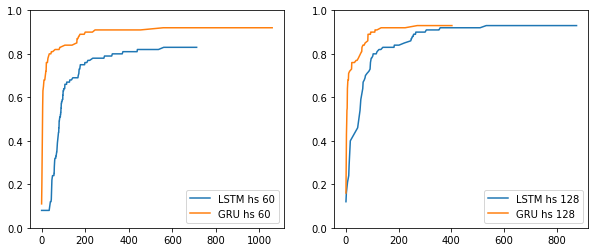

In [319]:
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

l2, = ax2.plot(x1, y1, label='LSTM hs 60')
l4, = ax2.plot(gru2[0], gru2[1], label='GRU hs 60')
ax2.legend(handles=[l2, l4])
ax2.set_ylim([0,1])

l1, = ax1.plot(x, y, label='LSTM hs 128')
l3, = ax1.plot(gru1[0], gru1[1], label='GRU hs 128')
ax1.legend(handles=[l1, l3])
ax1.set_ylim([0,1])
plt.savefig('GRU-vs-LSTM.eps')


In [320]:
import torch

In [325]:
sd = torch.load('model/gru_2l_conv_2019-05-11T05:59:39.829407_0.92.pt', map_location=lambda storage, loc: storage)

In [327]:
sd['drnn.input_conv.weight'].shape

torch.Size([1, 1, 3, 3])

In [328]:
sd.keys()

odict_keys(['drnn.rnn_module.weight_ih_l0', 'drnn.rnn_module.weight_hh_l0', 'drnn.rnn_module.bias_ih_l0', 'drnn.rnn_module.bias_hh_l0', 'drnn.rnn_module.weight_ih_l1', 'drnn.rnn_module.weight_hh_l1', 'drnn.rnn_module.bias_ih_l1', 'drnn.rnn_module.bias_hh_l1', 'drnn.input_conv.weight', 'drnn.input_conv.bias', 'linear.weight', 'linear.bias'])

In [329]:
sd['drnn.rnn_module.weight_ih_l0'].shape

torch.Size([120, 38])

In [330]:
def get_network_size(sd):
    ret = 0
    for tensor in sd.values():
        partial = 1
        for d in tensor.shape:
            partial *= d
        ret += partial
    return ret

In [331]:
get_network_size(sd)

19942